In [19]:
# Outcomment to import and convert .py file to .ipynb
# %load K_ex2_2_2.py


### Script Description
---
This script computes and plots the variance explained and projects data 
onto principal component space. 

It also plots the a reconstruction of the
data to its original space with the chosen number of principal components.


#### ML tags
* Variance Explained
* Inverse Transformation
* PC

#### Pandas tags
groupby $\cdot$

#### Structure
- ...

#### Details
2021 celiacailloux@gmail.com
 
#### Exercise Name
exercise 2.2.2 (course 02450 DTU 2018)

---

In [20]:
# import custom-made modules
from submodules.file_manage_pickle import save_as_pickle, get_saved_pickle
from submodules.plot_ML_course import save_figure_w_comment, save_figure_as_script_title

In [133]:
# import standard modules
from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, title, \
                               yticks, show,legend,imshow, cm)
from scipy.io import loadmat
from os.path import basename, splitext, join
from os import getcwd
# import scipy.linalg as linalg
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [22]:
exerciseName = 'K_ex2_2_2'

import_data             = False

plot_variance_explained = False
plot_PCi_vs_PCj         = False
plot_PC_reconstruction  = True 
save_figure             = True

## 1 Import Data

Ran Exercise K_2.2.1



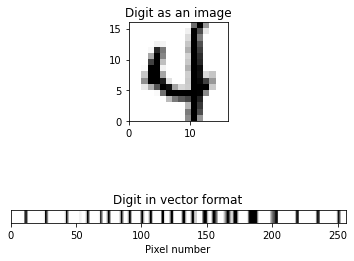

In [23]:
# data is loaded in K_ex2_2_1 and saved as a pickle
if import_data:
    from K_ex2_2_1 import X, y
    data = {'X' : X, 
            'y' : y}
    save_as_pickle(pkl_data = data, pkl_name = 'data')
else:
    data = get_saved_pickle(pkl_name = 'data')
    
    X = data['X']
    y = data['y']     

In [24]:
# 
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.000
1,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.000
2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.000
3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
4,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.000


In [25]:
y.head()

,class
0,6.000
1,5.000
2,4.000
3,7.000
4,3.000


## 2 Assign Data Variables

Select the classes to be visualized and reconstructed. Each class refers to a digit.

In [30]:
# Number of principal components for reconstruction and number of digits 
# (observations N) to visualize, aka number of digits
K = 16
n = range(6)

In [32]:
# Selection of classes, aka in this case digits to include in analysis and
# plotting (to include all, n = range(10)) and number of classes (C)
# Classes represented by values, strings and paired in a dict
classValues     = [0,1] 
# classValues     = sorted(set(y['class'])) # uncomment if you want all digits (0-9)
classNames      = [str(class_i) for class_i in classValues]
classDict       = dict(zip(classNames,classValues))

#%%
# Select subset of digits classes (c) to be inspected, by
# making a mask of booleans
class_mask  = y['class'].isin(classValues) # pandas masking with regards to a list
X           = X[class_mask] # masking rows in pandas
y           = y[class_mask]
# number of observations of the subset and number of pixels (sqrt_Mxsqrt_M)
N, M        = X.shape
sqrt_M      = int(np.sqrt(M))
C           = len(classValues)

# Get the variance explained and the data projected onto principal component 
# space (B or Z)
pca             = PCA(n_components = K).fit(X)
exp_var_pca     = pca.explained_variance_ratio_ 
B_array         = pca.fit_transform(X)
Z = pd.DataFrame(data = B_array, #B_std_array
                 index = range(0,len(B_array)),
                 columns = ['PC{}'.format(i) for i in range(1, K+1)])#B_array.shape[1]+1)])
X_proj          = pd.DataFrame(pca.inverse_transform(Z), columns = X.columns)
# %%

In [ ]:
if plot_variance_explained:
    # Plot variance explained
    figure()
    plot(range(1, K+1), exp_var_pca,'o-')# percentage of variance explained
    # plot(pca.explained_variance_, 'o-')
    title('Variance explained by principal components\nDigits data');
    xlabel('Principal component');
    ylabel('Variance explained value');
    if save_figure:
        save_figure_as_script_title(__file__,
                                    comment = \
                                        'USPS_handwritten_Variance_explained_by_PC_w_{}_PCs'.format(K))

In [ ]:
if plot_PCi_vs_PCj:
    # Plot PCA of the data
    f = figure()
    title('pixel vectors of handwr. digits projected on PCs')
    for _class in c:
        # select indices belonging to class c:
        class_mask_plot = (y['class'] == _class).reset_index(drop = True)
        plot(Z['PC1'][class_mask_plot], Z['PC2'][class_mask_plot], 'o')
    legend(classNames)
    xlabel('PC1')
    ylabel('PC2')
    if save_figure:
            save_figure_as_script_title(__file__,
                                        comment = \
                                            'USPS_handwritten_digits_PC1vsPC2')    

In [ ]:
if plot_PC_reconstruction:
    # Visualize the reconstructed data (X_reconstructured) from the first K
    # principal components by selectecting D number of observations (or D
    # number of random observations x_idx)
    figure(figsize=(10,3))
    D = len(n)
    for d in range(D):
        x_idx = np.random.randint(0,N)
        subplot(2, D, d+1)
        
        # I = X.iloc[x_idx,:].values.reshape(16,16)
        I = X.iloc[d,:].values.reshape(sqrt_M,sqrt_M)        
        imshow(I, cmap=cm.gray_r)
        title('Original')
        
        subplot(2, D, D+d+1)
        # I = np.reshape(X_proj[d,:], (sqrt_M,sqrt_M))
        I = X_proj.iloc[d,:].values.reshape(sqrt_M,sqrt_M) 
        imshow(I, cmap=cm.gray_r)
        title('Reconstr.')
    if save_figure:
        save_figure_w_comment(figTitle = exerciseName,
                    comment = \
                    'USPS_handwritten_original_vs_reconstructed_digit_w_{}_PCs'.format(K))  

## 5 Visualize the Principal components

* *K* is number of principal components (PC)
* *N1* 
* *V* is a unitary matrix computed when decomposing *X* ($ X = U \Sigma V^T $). *V* will have the shape (n_features x n_components)

In [131]:
# Visualize the pricipal components
V       = pd.DataFrame(PCA().fit(X).components_, 
                       index = ['PC{}'.format(i) for i in range(1, M+1)])

V

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
PC1,0.000,0.000,0.001,0.004,0.012,0.030,0.036,-0.018,0.007,0.039,...,0.076,0.025,-0.004,0.043,0.036,0.013,0.003,0.000,0.000,0.000
PC2,0.000,-0.001,0.000,-0.002,-0.006,-0.000,0.025,0.023,0.018,0.006,...,0.031,0.045,0.043,0.038,0.005,-0.006,-0.003,-0.000,-0.000,-0.000
PC3,0.000,0.000,-0.000,-0.000,0.001,-0.009,-0.014,-0.039,-0.039,-0.021,...,-0.066,-0.074,-0.047,-0.009,-0.010,0.001,0.001,0.001,0.000,0.000
PC4,0.000,0.002,0.002,0.005,0.008,0.003,-0.023,-0.076,-0.062,-0.020,...,-0.016,-0.040,-0.069,-0.044,-0.035,-0.015,-0.002,-0.000,-0.000,-0.000
PC5,-0.001,-0.001,-0.001,0.001,0.002,-0.010,-0.083,-0.120,-0.158,-0.116,...,-0.111,-0.124,-0.166,-0.209,-0.116,-0.045,-0.010,-0.001,0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC252,0.650,-0.001,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.001,0.006,-0.000
PC253,-0.017,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.001,-0.006,0.000
PC254,-0.004,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,...,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
PC255,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,...,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000


Subplot width: 4
Subplot height: 4


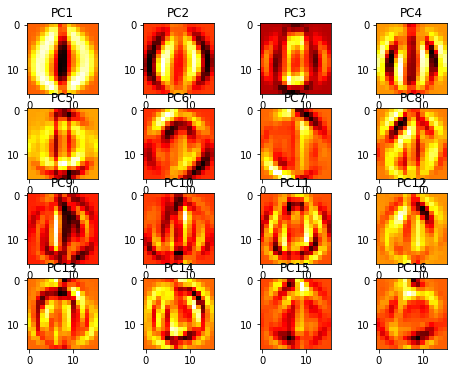

In [132]:
figure(figsize=(8,6))
N1 = int(np.ceil(np.sqrt(K)))
N2 = int(np.ceil(K/N1))
print('Subplot width: {0}\nSubplot height: {1}'.format(N1, N2)) 
for k in range(K):
    subplot(N2, N1, k+1)
    I = V.iloc[k,:].values.reshape(sqrt_M,sqrt_M) 
    imshow(I, cmap=cm.hot)
    title('PC{0}'.format(k+1))

Subplot width: 4
Subplot height: 4


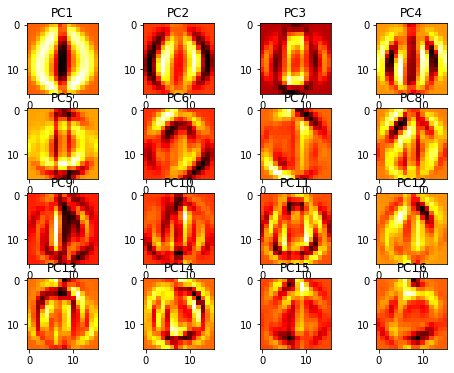

In [129]:
# Visualize the pricipal components
V       = pd.DataFrame(pca.components_,
                       index = Z.columns)
V.head()

Subplot width: 4
Subplot height: 4


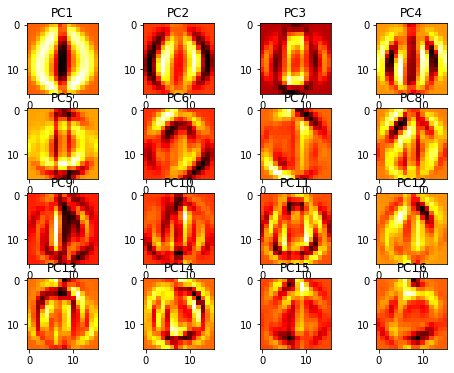

In [130]:
figure(figsize=(8,6))
N1 = int(np.ceil(np.sqrt(K)))
N2 = int(np.ceil(K/N1))
print('Subplot width: {0}\nSubplot height: {1}'.format(N1, N2)) 
for k in range(K):
    subplot(N2, N1, k+1)
    I = V.iloc[k,:].values.reshape(sqrt_M,sqrt_M) 
    imshow(I, cmap=cm.hot)
    title('PC{0}'.format(k+1))

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
PC1,0.000,0.000,0.001,0.004,0.012,0.030,0.036,-0.018,0.007,0.039,...,0.076,0.025,-0.004,0.043,0.036,0.013,0.003,0.000,0.000,-0.000
PC2,0.000,-0.001,0.000,-0.002,-0.006,-0.000,0.025,0.023,0.018,0.006,...,0.031,0.045,0.043,0.038,0.005,-0.006,-0.003,-0.000,-0.000,-0.000
PC3,0.000,0.000,-0.000,-0.000,0.001,-0.009,-0.014,-0.039,-0.039,-0.021,...,-0.066,-0.074,-0.047,-0.009,-0.010,0.001,0.001,0.001,0.000,-0.000
PC4,0.000,0.002,0.002,0.005,0.008,0.003,-0.023,-0.076,-0.062,-0.020,...,-0.016,-0.040,-0.069,-0.044,-0.035,-0.015,-0.002,-0.000,-0.000,-0.000
PC5,-0.001,-0.001,-0.001,0.001,0.002,-0.010,-0.083,-0.120,-0.158,-0.116,...,-0.111,-0.124,-0.166,-0.209,-0.116,-0.045,-0.010,-0.001,0.000,-0.000


In [123]:
V.shape

(16, 256)

## Outro

In [103]:
print('Ran Exercise {}'.format(exerciseName))

Ran Exercise K_ex2_2_2


## Jupyter Notebook Tutorial

In [ ]:
%cat submodules/plot_ML_course.py

In [ ]:
%%writefile test_fct.py
def test_fct():
    print('this is a test')

In [ ]:
%cat test_fct.py